In [214]:
#Purpose: clean SESAR data and store them to cleanedfile, train file and test file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
original = pd.read_csv('../Collections_data/SESAR_5000_original.csv')
core = pd.read_csv('../Collections_data/SESAR_5000_core.csv')

In [216]:
original = original.drop([original.columns[0]], axis=1)
core = core.drop([core.columns[0]], axis=1)

In [217]:
CVs = core[['hasContextCategory', 'hasMaterialCategory', 'hasSpecimenCategory']]
CVs['hasContextCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                                    0.6452
Earth interior                                  0.3380
Subaerial surface environment                   0.0050
Marine water body bottom                        0.0038
Terrestrial water body                          0.0028
Lake river or stream bottom                     0.0012
Marine water body                               0.0012
Subsurface fluid reservoir                      0.0012
Marine biome                                    0.0010
Earth interior Subaerial surface environment    0.0006
Name: hasContextCategory, dtype: float64

0 3226
1 1690
2 25
3 19
4 14
5 6
6 6
7 6
8 5
9 3


Text(0.5, 0, 'count')

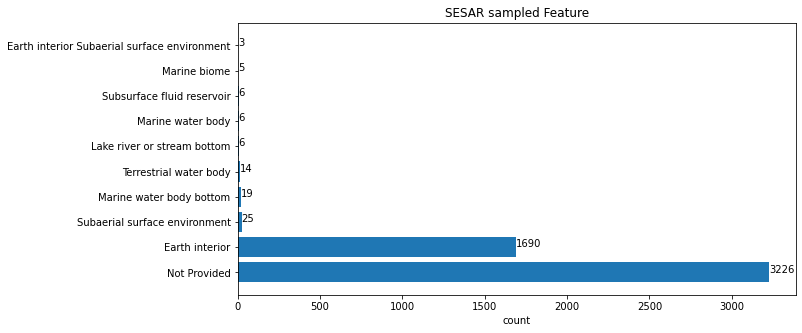

In [218]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasContextCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR sampled Feature')
plt.xlabel('count')

In [219]:
CVs['hasMaterialCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                                     0.4916
Rock                                             0.2038
Mineral                                          0.1348
Organic material                                 0.1072
Sediment                                         0.0422
Water                                            0.0148
Soil                                             0.0050
Organic material Biogenic nonorganic material    0.0002
Gaseous material                                 0.0002
Mineral Organic material                         0.0002
Name: hasMaterialCategory, dtype: float64

0 2458
1 1019
2 674
3 536
4 211
5 74
6 25
7 1
8 1
9 1


Text(0.5, 0, 'count')

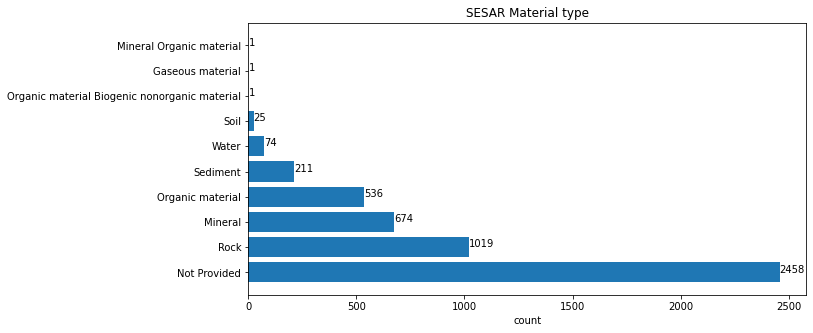

In [220]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasMaterialCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR Material type')
plt.xlabel('count')

In [221]:
CVs['hasSpecimenCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Other solid object        0.9178
Aggregation               0.0508
Not Provided              0.0202
Analytical preparation    0.0074
Liquid or gas sample      0.0034
Experiment product        0.0004
Name: hasSpecimenCategory, dtype: float64

0 4589
1 254
2 101
3 37
4 17
5 2


Text(0.5, 0, 'count')

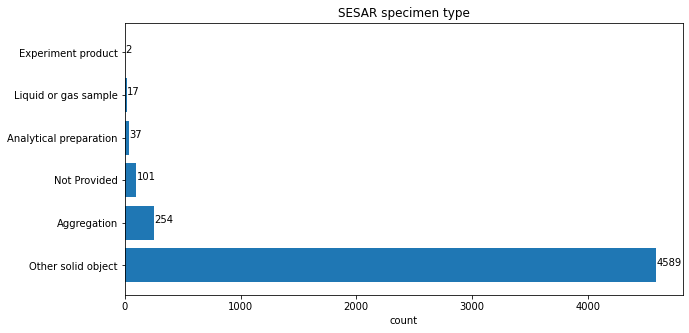

In [222]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasSpecimenCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR specimen type')
plt.xlabel('count')

In [223]:
df = pd.concat([original, CVs], axis=1)
df.replace(np.nan, '', regex=True, inplace=True)

In [224]:
#, 
Nofields = ['igsn', '@context','description.log','registrant.name', 'registrant.identifiers.id', 'registrant.identifiers.kind', 'description.collector', 
'description.publisher.@id', 'description.publisher.url', 'description.publisher.contactPoint.url', 'description.publisher.contactPoint.email',
'description.contributors', 'description.collectorDetail', 'description.supplementMetadata.depthMax', 'description.supplementMetadata.depthMin',
'description.supplementMetadata.document', 'description.supplementMetadata.sampleId', 'description.supplementMetadata.childIGSN', 'description.supplementMetadata.elevation',
'description.supplementMetadata.depthScale', 'description.supplementMetadata.elevationUnit', 'description.supplementMetadata.publicationUrl',
'description.collectionStartDate', 'description.collectionDatePrecision', 'description.parentIdentifier', 'description.supplementMetadata.siblingIGSN',
'description.supplementMetadata.platformType', 'description.supplementMetadata.size', 'description.supplementMetadata.sizeUnit', 'description.geoLocation.geo',
'description.supplementMetadata.currentArchiveContact', 'description.publisher.name', 'description.publisher.@type', 'description.publisher.contactPoint.name',
'description.publisher.contactPoint.@type', 'description.publisher.contactPoint.contactType', 'description.geoLocation.@type', 'description.supplementMetadata.zone',
'description.supplementMetadata.easting', 'description.supplementMetadata.northing', 'description.supplementMetadata.ageMax', 'description.supplementMetadata.ageMin',
'description.supplementMetadata.ageUnit', 'description.supplementMetadata.elevationEnd', 'description.supplementMetadata.verticalDatum', 'description.collectionEndDate',
'description.supplementMetadata.launchId', 'description.supplementMetadata.launchTypeName', 'description.sampleName','description.supplementMetadata.platformDescr',
'description.supplementMetadata.currentArchive', 'description.supplementMetadata.navigationType', 'description.igsnPrefix', 'description.supplementMetadata.originalArchive',
'description.supplementMetadata.externalSampleId', 'description.supplementMetadata.cruiseFieldPrgrm']
cleaned = df.drop(Nofields, axis=1)

In [225]:
cleaned

,@id,description.material,description.sampleType,description.supplementMetadata.purpose,description.supplementMetadata.locality,description.supplementMetadata.province,description.supplementMetadata.otherName,description.supplementMetadata.geologicalAge,description.supplementMetadata.sampleComment,description.supplementMetadata.geologicalUnit,...,description.supplementMetadata.localityDescription,description.supplementMetadata.locationDescription,description.supplementMetadata.county,description.supplementMetadata.city,description.supplementMetadata.platformName,description.supplementMetadata.launchPlatformName,description.supplementMetadata.classificationComment,hasContextCategory,hasMaterialCategory,hasSpecimenCategory
0,https://data.geosamples.org/sample/igsn/GBP300156,Rock,Cuttings,Cuttings analysis,50223200290000,AK,['5150-5180 ft MD Envelope of air-dried cuttin...,Tertiary,Envelope of air-dried cuttings,"Staines Tongue, Sagavarnirktok Fm.",...,,,,,,,,['Earth interior'],['Rock'],['Aggregation']
1,https://data.geosamples.org/sample/igsn/ODP013LFC,,Core Section,,,,[],,,,...,,,,,,,,['Not Provided'],['Not Provided'],['Other solid object']
2,https://data.geosamples.org/sample/igsn/DSR000GGG,Sediment,Core Piece,haptophyte biomarker indices,,,[],,depth in core is approximate,,...,,,,,,,,['Not Provided'],['Sediment'],['Other solid object']
3,https://data.geosamples.org/sample/igsn/IEUHM00BL,Igneous>Volcanic>Exotic>Rock,Dredge,Geological studies,,,[],,duplicate samples also stored at Scripps.,,...,,,,,,,,['Earth interior'],['Rock'],['Aggregation']
4,https://data.geosamples.org/sample/igsn/IEUHM001F,Igneous>Volcanic>Mafic>Rock,Dredge,Geological studies,,,[],,,,...,,,,,,,,['Earth interior'],['Rock'],['Aggregation']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://data.geosamples.org/sample/igsn/NEON0017P,Macrobiology>Biology,Individual Sample,,,Alabama,[],,,,...,,,Bibb,,,,,['Not Provided'],['Organic material'],['Other solid object']
4996,https://data.geosamples.org/sample/igsn/ODP018TW7,,Core Section Half,,,,[],,,,...,,,,,,,,['Not Provided'],['Not Provided'],['Other solid object']
4997,https://data.geosamples.org/sample/igsn/ODP01DDGI,,Core Sub-Piece,,,,[],,,,...,,,,,,,,['Not Provided'],['Not Provided'],['Other solid object']
4998,https://data.geosamples.org/sample/igsn/ODP01G4JL,,Core Section Half,,,,[],,,,...,,,,,,,,['Not Provided'],['Not Provided'],['Other solid object']


In [226]:
#caluate how many records are empty for each field
fields = original.drop(Nofields, axis=1).drop(['@id'], axis=1)
empty_fields = fields.isnull().sum()/5000 * 100

Text(0.5, 0, 'Percentage % (total 5000 records sampled from 1784731 records)')

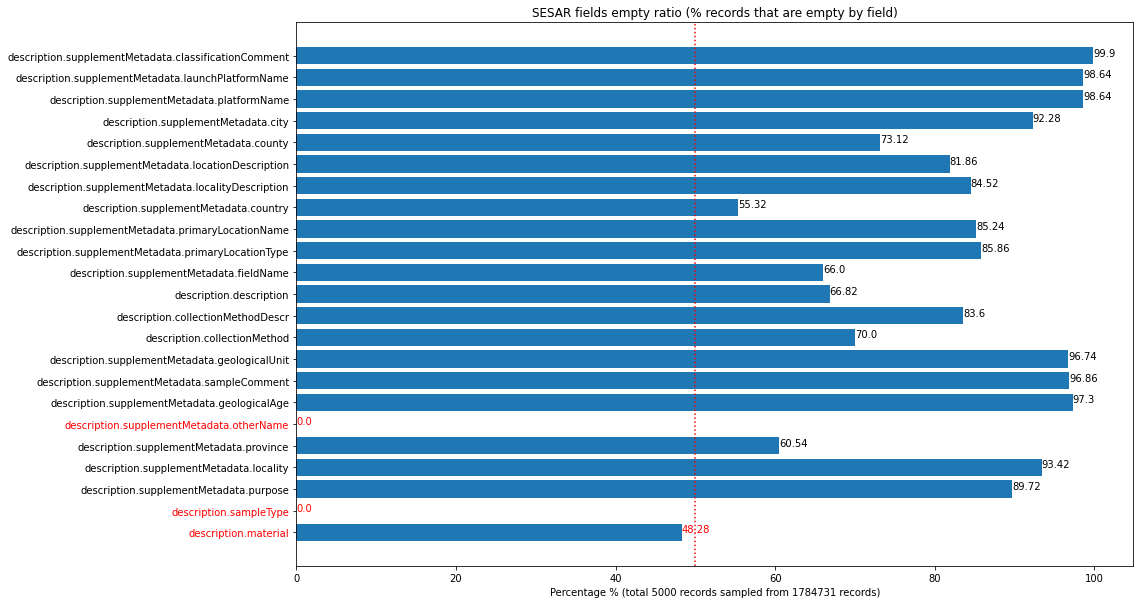

In [227]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot()
p = ax.barh(empty_fields.keys(), empty_fields)
for i, rect in enumerate(empty_fields.index):
    ax.text(empty_fields[rect], i,  round(empty_fields[rect], 4), color = 'black' if round(empty_fields[rect], 4) >= 50 else 'red')
plt.gca().get_yticklabels()[0].set_color('red') 
plt.gca().get_yticklabels()[1].set_color('red')
plt.gca().get_yticklabels()[5].set_color('red')
plt.axvline(50, color='red', ls='dotted')
plt.title("SESAR fields empty ratio (% records that are empty by field)")
plt.xlabel('Percentage % (total 5000 records sampled from 1784731 records)')

In [228]:
#SpecimenType 
specimenType = cleaned.drop(['hasContextCategory', 'hasMaterialCategory'], axis=1)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace('[^\w\s]','', regex=True)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace(' ','_', regex=True)
specimenType['hasSpecimenCategory'] = "__label__" + specimenType['hasSpecimenCategory']
specimenType['text'] = ""
for col in specimenType.columns[1:len(specimenType.columns)-2]:
    specimenType['text']  += str(specimenType[col]) +' '

specimenType['text'] = specimenType['text'].str.replace('[^\w\s]','', regex=True)
specimenType['text'] = specimenType['text'].str.lower()
specimenType['text'] = specimenType['text'].replace('\s+', ' ', regex=True)

result = specimenType.loc[specimenType['hasSpecimenCategory'] != '__label__Not_Provided']
result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasSpecimenCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_specimenType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_specimenType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_specimenType.valid', header=False, index=False)

700 300


In [229]:
#Material Type
materialType = cleaned.drop(['hasContextCategory', 'hasSpecimenCategory'], axis=1)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace('[^\w\s]','', regex=True)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace(' ','_', regex=True)
materialType['hasMaterialCategory'] = "__label__" + materialType['hasMaterialCategory']

materialType['text'] = ""
for col in materialType.columns[1:len(materialType.columns)-2]:
    materialType['text']  += str(materialType[col]) +' '

materialType['text'] = materialType['text'].str.replace('[^\w\s]','', regex=True)
materialType['text'] = materialType['text'].str.lower()
materialType['text'] = materialType['text'].replace('\s+', ' ', regex=True)

result = materialType.loc[materialType['hasMaterialCategory'] != '__label__Not_Provided']

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasMaterialCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_materialType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_materialType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_materialType.valid', header=False, index=False)

700 300


In [230]:
result[['hasMaterialCategory','text']].to_csv('SESAR_1000_material.csv')

In [231]:
#Sampled Feature
sampeldFeature = cleaned.drop(['hasMaterialCategory', 'hasSpecimenCategory'], axis=1)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace(' ','_', regex=True)
sampeldFeature['hasContextCategory'] = "__label__" + sampeldFeature['hasContextCategory']

sampeldFeature['text'] = ""
for col in sampeldFeature.columns[1:len(sampeldFeature.columns)-2]:
    sampeldFeature['text']  += str(sampeldFeature[col]) +' '

sampeldFeature['text'] = sampeldFeature['text'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['text'] = sampeldFeature['text'].str.lower()
sampeldFeature['text'] = sampeldFeature['text'].replace('\s+', ' ', regex=True)

result = sampeldFeature.loc[sampeldFeature['hasContextCategory'] != '__label__Not_Provided']

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasContextCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_sampeldFeature.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_sampeldFeature.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_sampeldFeature.valid', header=False, index=False)

700 300
